# Group HWA1 - 2

Draw $X$ from density $g(x)$
- the upper bound $\overline{h}_n(x) = \log\{M_ng_n(x)\}$
- $\overline{h}_n(x) = \log\{M_ng_n(x)\}$ is formed by piecewise linear functions 
- It is formed by $r_n$ linear functions<br>
$$
g_n(x) = M_n^{-1} \left\{
    \exp(a_{-1} + b_{-1} x) 1_{[-\infty, x_0]}(x) + 
    \sum_{j=0}^{r_n} \exp(a_j + b_j x) 1_{[x_j, x_{j+1}]}(x) + 
    \exp(a_{r_n+1} + b_{r_n+1} x) 1_{[x_{r_n+1}, \infty]}(x)
\right\}
$$
where $M_n$ is the normalizaing constant that makes $g_n(x)$ a density function.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(3407)

/var/folders/hr/2t7hsj753qg3n1q7zbnr625m0000gn/T/ipykernel_21634/1656240952.py:31: RuntimeWarning: overflow encountered in exp
  if U <= np.exp(get_g(X) - upperbound(X)):


(array([1.24541276, 0.90185062, 0.62986392, 0.73006955, 0.64417901,
        0.77301481, 0.50102812, 0.61554883, 0.7873299 , 0.64417901,
        0.37219232, 0.4008225 , 0.44376776, 0.28630178, 0.30061687,
        0.37219232, 0.2576716 , 0.30061687, 0.30061687, 0.24335652,
        0.27198669, 0.20041125, 0.22904143, 0.27198669, 0.18609616,
        0.14315089, 0.1288358 , 0.08589053, 0.14315089, 0.10020562,
        0.14315089, 0.1288358 , 0.05726036, 0.11452071, 0.1288358 ,
        0.01431509, 0.07157545, 0.11452071, 0.08589053, 0.02863018,
        0.07157545, 0.02863018, 0.04294527, 0.04294527, 0.04294527,
        0.01431509, 0.10020562, 0.07157545, 0.04294527, 0.        ,
        0.02863018, 0.01431509, 0.01431509, 0.01431509, 0.04294527,
        0.01431509, 0.        , 0.02863018, 0.01431509, 0.02863018,
        0.01431509, 0.        , 0.01431509, 0.01431509, 0.01431509,
        0.01431509, 0.02863018, 0.01431509, 0.01431509, 0.        ,
        0.01431509, 0.02863018, 0.        , 0.  

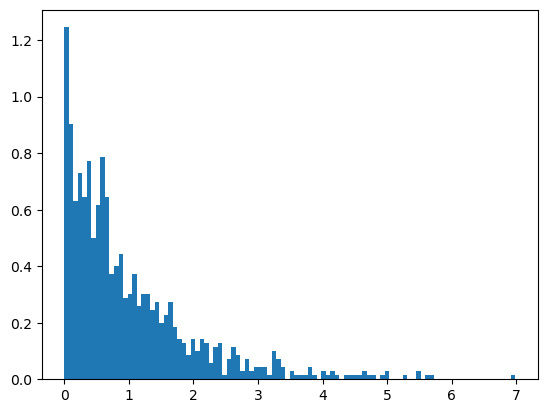

In [ ]:
#parameters
r_n  = 2
a_negative = -1
b_negative = 1
parameter_a = [1,1,1]
parameter_b = [2,2,2]
a_plus = -2
b_plus = 3
S_n = [0,1,2,3] #from g(x) # x_0 ,x_1, x_2, x_3

def get_upper_bound(x):
    if x <= S_n[0]:
        return a_negative + b_negative*x
    elif x >=S_n[r_n+1]:
        return a_plus + b_plus*x
    else:
        ans = 0
        for i in range(r_n):
            if S_n[i] <= x and x <= S_n[i+1]:
                ans+= (parameter_a[i] + parameter_b[i]*x)
        return ans

def get_line(x1,y1,x2,y2):
    if x1 == x2:
        return f"x = {x1}"
    else:
        m = (y2 - y1) / (x2 - x1)
    b = y1 - m*x1
    return m,b

def get_lower_bound(x):
    
    


# Group HWA1 - 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Parameters
S_0 = 1
r = 0.05
sigma = 0.2
K = 1
M = 200
T = 1
N = 1000
t_values = [m * T / M for m in range(1, M + 1)]
t_values.insert(0, 0)

In [ ]:
np.random.seed(3407)
def get_S_values(S_0,r,sigma,K):
    S_values = [S_0]
    Z = np.random.normal(0,1,M+1)
    #Z = np.random.normal(0,1)
    for m in range(1,M+1):
        S_value = S_values[m-1] * np.exp((r - 0.5*sigma**2)*(t_values[m] - t_values[m-1]) + sigma * np.sqrt(t_values[m] - t_values[m-1])* Z[m])
        #S_value = S_values[m-1] * np.exp((r - 0.5*sigma**2)*(t_values[m] - t_values[m-1]) + sigma * np.sqrt(t_values[m] - t_values[m-1])* Z)
        S_values.append(S_value)
    return S_values

S = get_S_values(S_0,r,sigma,K)

In [3]:
Asian_option_values = []
def  get_Asian_option_values(S,r,T,M,K):
    Asian_option_value = np.exp(-r*T)*np.maximum(np.mean(S)-K,0)
    return Asian_option_value

for i in range(0,N):
    S = get_S_values(S_0,r,sigma,K)
    Asian_option_values.append(get_Asian_option_values(S,r,T,M,K))

In [ ]:
Asian_option_values = np.array(Asian_option_values)
Asian_option_values.mean()
print(f'Asian_option_value:{Asian_option_values.mean()}')
Variance = 1/(N-1)*np.sum((Asian_option_values - Asian_option_values.mean())**2)
print(f'Varaince:{Variance}')
Standerd_Error = np.sqrt(Variance/N)
print(f'Standerd_Error:{Standerd_Error}')

Asian_option_value:0.062496977610974835
Varaince:0.007053986646557547
Standerd_Error:0.002655934232347922


In [12]:
def confidence_interval(alpha,Asian_option_values):
    z = 1.96
    mean = Asian_option_values.mean()
    N = len(Asian_option_values)
    standerd_error = np.sqrt(Variance/N)
    lower_bound = mean - z*standerd_error
    upper_bound = mean + z*standerd_error
    return lower_bound,upper_bound

In [13]:
print(f'CI={confidence_interval(0.05,Asian_option_values)}')

CI=(0.05729134651557291, 0.06770260870637676)


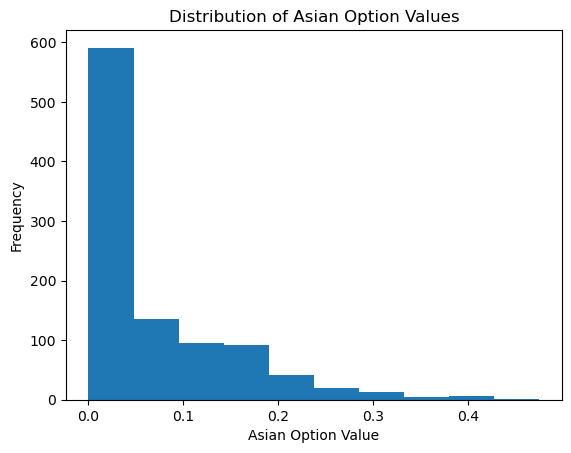

In [8]:
import matplotlib.pyplot as plt
plt.hist(Asian_option_values, bins=10)
plt.title("Distribution of Asian Option Values")
plt.xlabel("Asian Option Value")
plt.ylabel("Frequency")
plt.show()